# **1. Perkenalan Dataset**

Dataset ini berasal dari Kaggle: "Water Quality for Potability" oleh Aditya Kadiwal.
- **Sumber**: https://www.kaggle.com/datasets/adityakadiwal/water-potability
- **Tujuan**: Memprediksi kelayakan air minum berdasarkan parameter kimia
- **Fitur**: 9 parameter kualitas air
- **Target**: Potability (0 = Tidak Layak, 1 = Layak)
"""

## **1.1 Import Library yang akan digunakan**

In [1]:
# Import library yang dibutuhkan
#!pip install kaggle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import shutil

# Preprocessing & Modeling
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# Utilities
import joblib
import warnings
import zipfile
from IPython.display import display, Markdown
warnings.filterwarnings('ignore')

# Configure Visualization
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette('viridis')
pd.set_option('display.max_columns', 50)
print("✅ Libraries successfully imported")
from google.colab import drive
drive.mount('/content/drive')

✅ Libraries successfully imported
Mounted at /content/drive


# **2. Memuat Dataset**

In [2]:
from google.colab import files
files.upload()

target_folder = '/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_raw'
os.makedirs(target_folder, exist_ok=True)

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d adityakadiwal/water-potability -p {target_folder}
with zipfile.ZipFile(f'{target_folder}/water-potability.zip', 'r') as zip_ref:
   zip_ref.extractall(f'{target_folder}')


df = pd.read_csv('/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_raw/water_potability.csv')
df.head()

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/adityakadiwal/water-potability
License(s): CC0-1.0
  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 22.6MB/s]


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# **3. Exploratory Data Analysis (EDA)**

In [4]:
structure_report = pd.DataFrame({
    'Feature': df.columns,
    'Data Type': df.dtypes,
    'Unique Values': df.nunique(),
    'Missing Values': df.isna().sum(),
    '% Missing': round(df.isna().mean() * 100, 2),
    'Duplicated Values': df.duplicated().sum()
})
structure_report.set_index('Feature', inplace=True)
display(structure_report)

,Data Type,Unique Values,Missing Values,% Missing,Duplicated Values
Feature,,,,,
ph,float64,2785,491,14.99,0
Hardness,float64,3276,0,0.00,0
Solids,float64,3276,0,0.00,0
Chloramines,float64,3276,0,0.00,0
Sulfate,float64,2495,781,23.84,0
Conductivity,float64,3276,0,0.00,0
Organic_carbon,float64,3276,0,0.00,0
Trihalomethanes,float64,3114,162,4.95,0
Turbidity,float64,3276,0,0.00,0


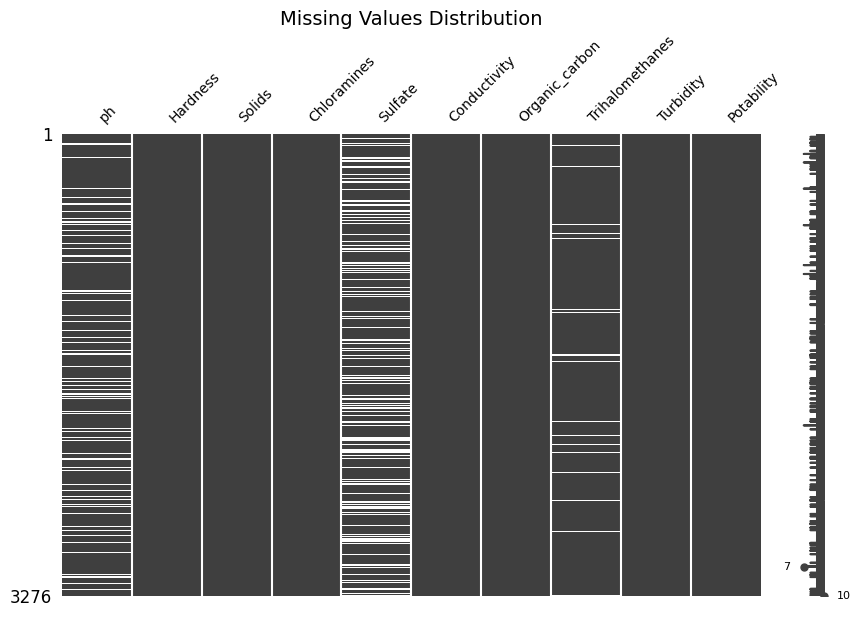

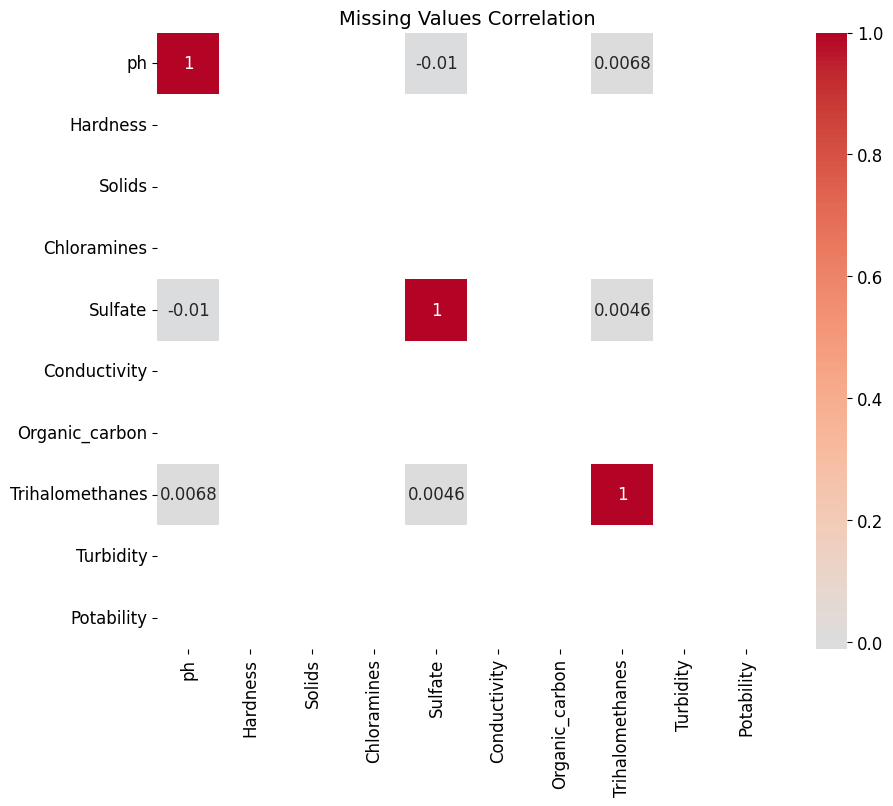

In [5]:
if df.isna().sum().sum() > 0:
    # Missing values matrix
    msno.matrix(df, figsize=(10, 6), fontsize=10)
    plt.title('Missing Values Distribution', fontsize=14)
    plt.savefig('/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/Doc_Result/missing_values_matrix.png')
    plt.show()

    # Missing values correlation
    missing_corr = df.isnull().corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(missing_corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Missing Values Correlation', fontsize=14)
    plt.savefig('/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/Doc_Result/missing_correlation.png')
    plt.show()
else:
    display(Markdown("✅ No missing values found"))

In [6]:
display(Markdown("### Numerical Features Summary"))
display(df.describe().T)

### Numerical Features Summary

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


Target Distribusi


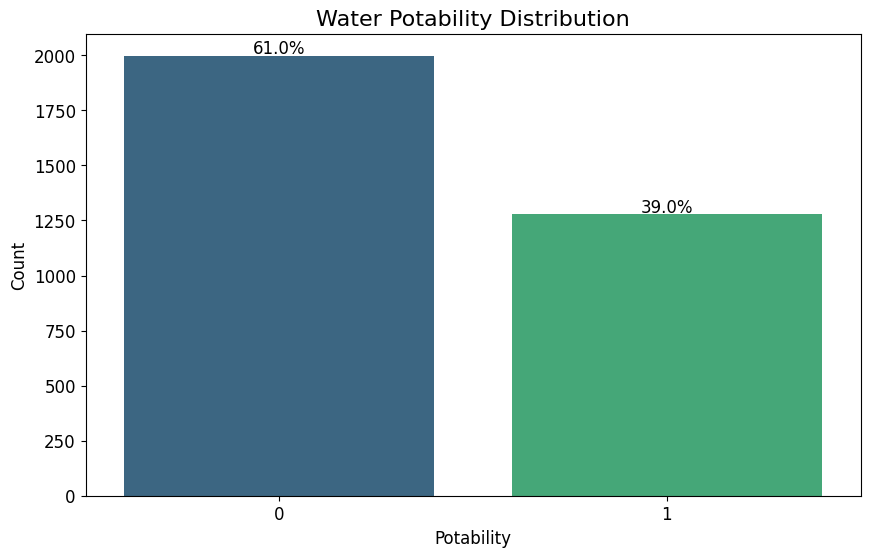

Feature Distributions


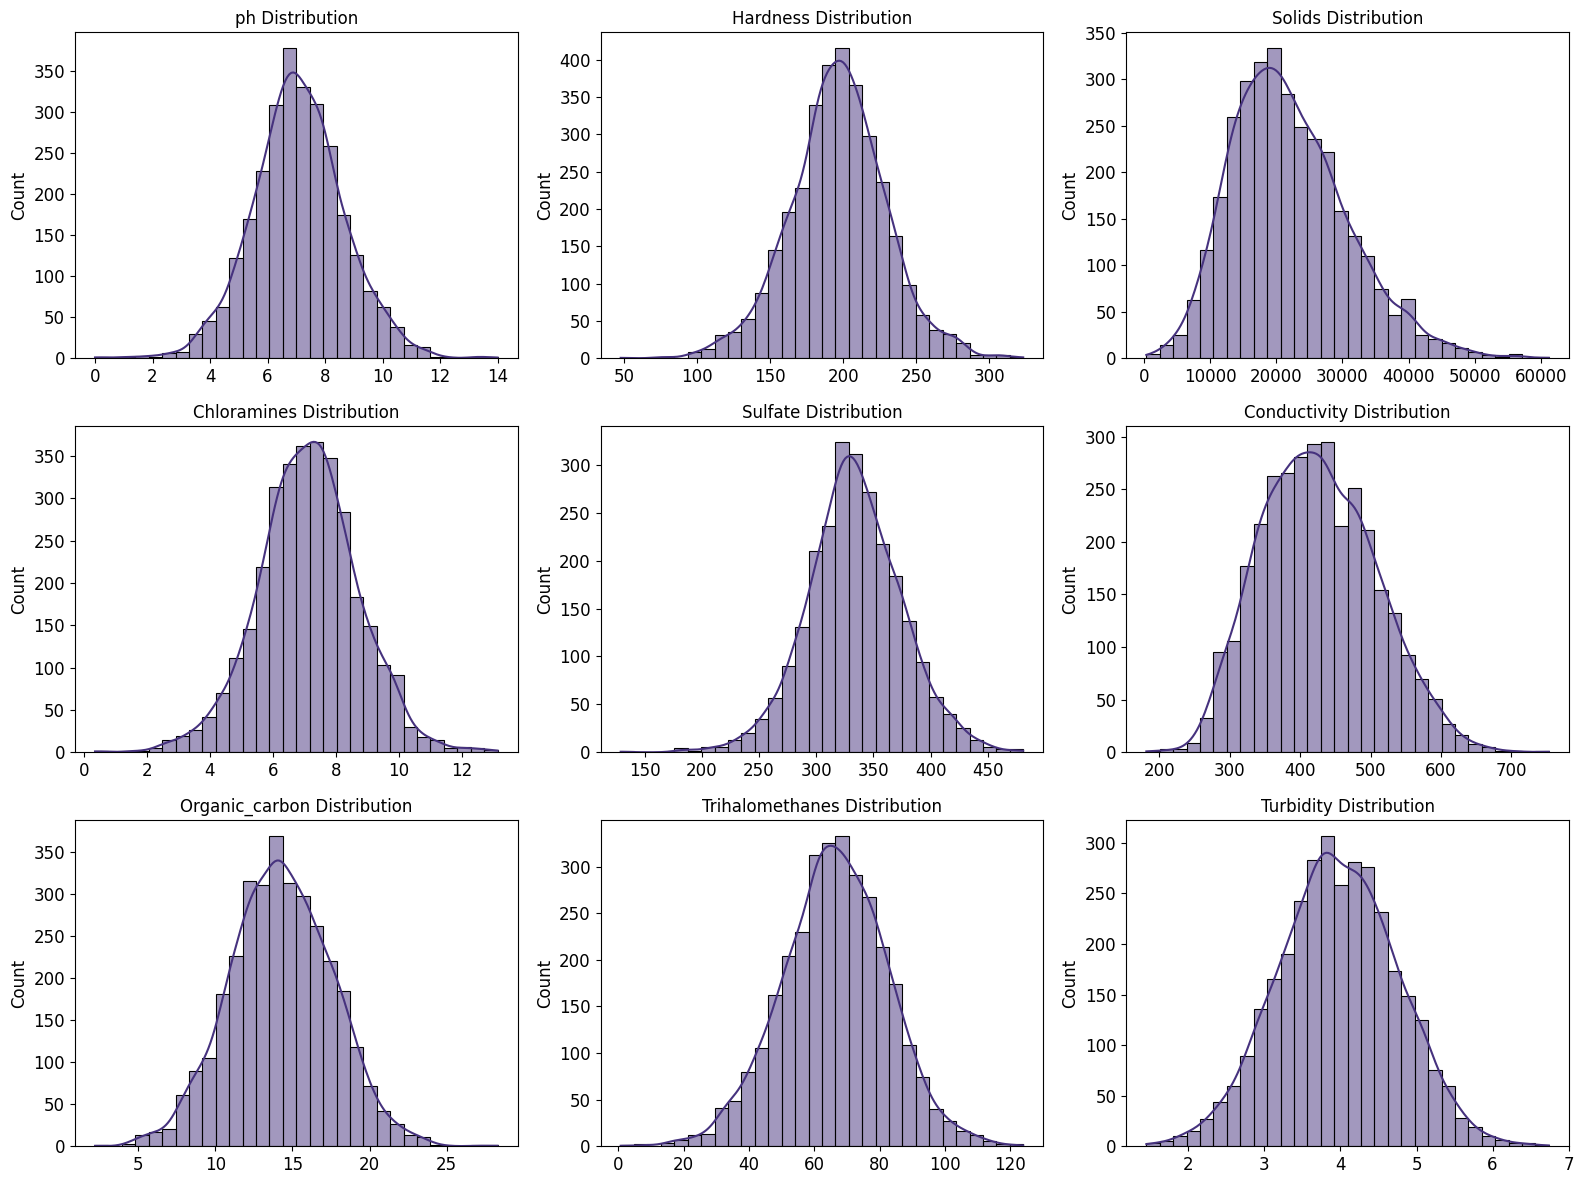

In [7]:
print("Target Distribusi")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Potability', data=df, palette='viridis')
plt.title('Water Potability Distribution', fontsize=16)
plt.xlabel('Potability')
plt.ylabel('Count')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10,
            f'{height/total:.1%}', ha='center')
plt.savefig('/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/Doc_Result/target_distribution.png')
plt.show()

print("Feature Distributions")

num_cols = df.select_dtypes(include=np.number).columns.drop('Potability')
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'{col} Distribution', fontsize=12)
    plt.xlabel('')
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/Doc_Result/feature_distributions.png')
plt.show()

## 📌 Deteksi Outlier

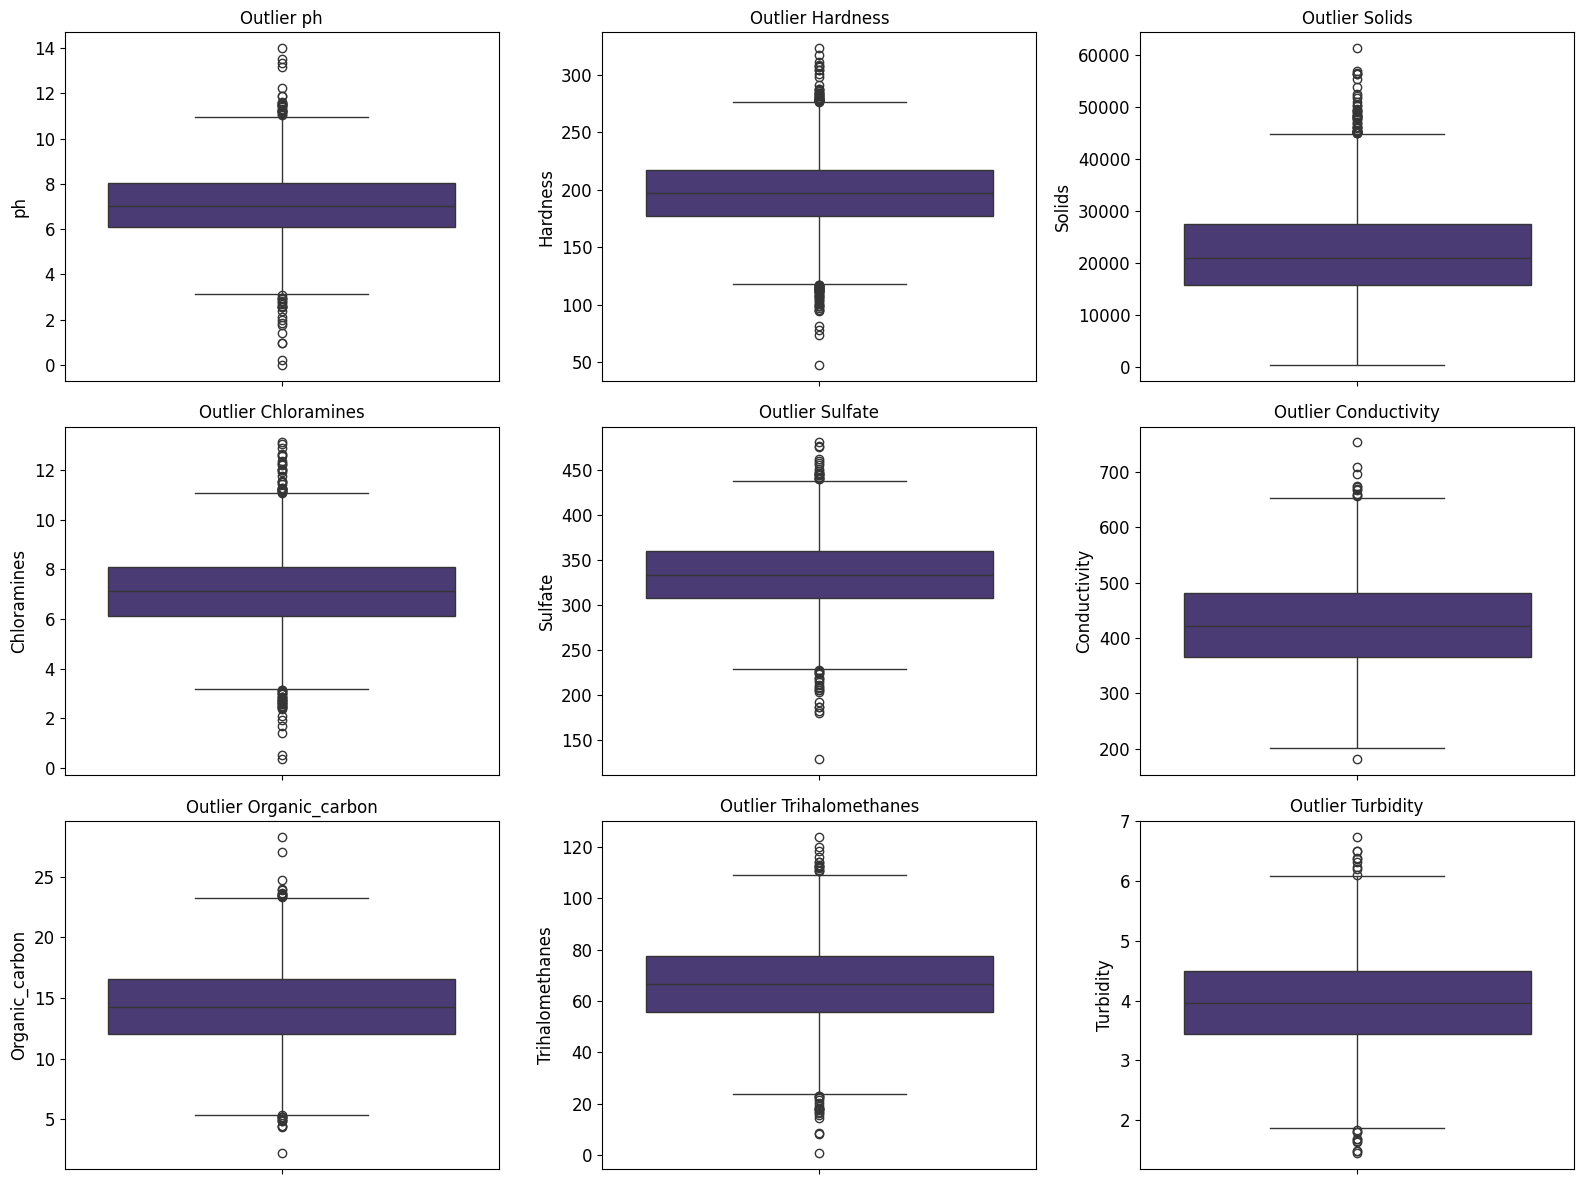

In [8]:
display(Markdown("## 📌 Deteksi Outlier"))
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Outlier {col}', fontsize=12)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/Doc_Result/outlier_detection.png')
plt.show()

# **4. Data Preprocessing**

In [10]:
print("Proses penanganan Duplikat")
initial_count = len(df)
df_clean = df.drop_duplicates()
final_count = len(df_clean)

dup_count = initial_count - final_count
print("- Initial Data Count:", initial_count)
print("- Final Data Count:", final_count)

Proses penanganan Duplikat
- Initial Data Count: 3276
- Final Data Count: 3276


In [11]:
print("Proses Penanganan Missing Values")

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(
    imputer.fit_transform(df_clean),
    columns=df_clean.columns
)

missing_after = df_imputed.isna().sum().sum()
print(f"Missing values setelah imputation: {missing_after}")

Proses Penanganan Missing Values
Missing values setelah imputation: 0


In [12]:
def iqr_capping(df, columns, factor=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

outlier_cols = ['Solids', 'Trihalomethanes', 'Conductivity']
df_imputed = iqr_capping(df_imputed, outlier_cols, factor=2.0)

print("✅ Outlier ditangani (IQR capping) untuk:")
print(f"   - Solids (Faktor 2.0)")
print(f"   - Trihalomethanes (Faktor 2.0)")
print(f"   - Conductivity (Faktor 2.0)")

✅ Outlier ditangani (IQR capping) untuk:
   - Solids (Faktor 2.0)
   - Trihalomethanes (Faktor 2.0)
   - Conductivity (Faktor 2.0)


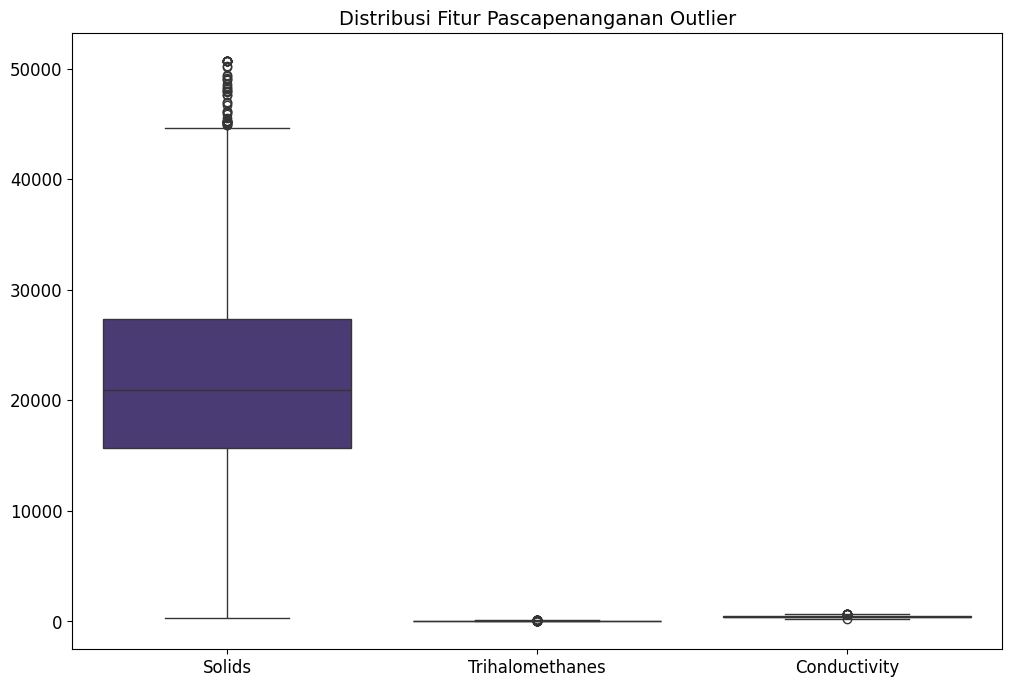

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_imputed[outlier_cols])
plt.title('Distribusi Fitur Pascapenanganan Outlier', fontsize=14)
plt.savefig('/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/Doc_Result/post_outlier_boxplot.png')
plt.show()

In [14]:
# Binning fitur numerik -> kategorikal
df_imputed['ph_category'] = pd.cut(
    df_imputed['ph'],
    bins=[0, 6.5, 8.5, 14],
    labels=['Asam', 'Netral', 'Basa'],
    include_lowest=True
)

df_imputed['hardness_level'] = pd.cut(
    df_imputed['Hardness'],
    bins=[0, 60, 120, 180, np.inf],
    labels=['Sangat Lunak', 'Lunak', 'Keras', 'Sangat Keras'],
    include_lowest=True
)

# Feature engineering numerik
df_imputed['mineral_saturation'] = df_imputed['Hardness'] * (10**(-df_imputed['ph']))
df_imputed['TDS_ratio'] = df_imputed['Solids'] / df_imputed['Conductivity']

print("✅ Dibuat fitur baru:")
print("   - ph_category (Asam/Netral/Basa)")
print("   - hardness_level (Sangat Lunak/Sangat Keras)")
print("   - mineral_saturation (Hardness * 10^-pH)")
print("   - TDS_ratio (Solids/Conductivity)")


✅ Dibuat fitur baru:
   - ph_category (Asam/Netral/Basa)
   - hardness_level (Sangat Lunak/Sangat Keras)
   - mineral_saturation (Hardness * 10^-pH)
   - TDS_ratio (Solids/Conductivity)


In [15]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df_imputed[['ph_category', 'hardness_level']])
encoded_df = pd.DataFrame(
    encoded_features,
    columns=encoder.get_feature_names_out(['ph_category', 'hardness_level'])
)

# Gabungkan dengan dataset utama
df_imputed = pd.concat([df_imputed, encoded_df], axis=1)
df_imputed = df_imputed.drop(columns=['ph_category', 'hardness_level'])

print("✅ Fitur kategorikal di-encode:")
print(f"   Kolom baru: {list(encoded_df.columns)}")

✅ Fitur kategorikal di-encode:
   Kolom baru: ['ph_category_Basa', 'ph_category_Netral', 'hardness_level_Lunak', 'hardness_level_Sangat Keras', 'hardness_level_Sangat Lunak']


In [16]:
# Pilih fitur numerik
numerical_features = [
    'Hardness', 'Solids', 'Chloramines', 'Sulfate',
    'Conductivity', 'Organic_carbon', 'Trihalomethanes',
    'Turbidity', 'mineral_saturation', 'TDS_ratio'
]

# Gunakan RobustScaler (resisten terhadap outlier)
scaler = RobustScaler()
df_imputed[numerical_features] = scaler.fit_transform(df_imputed[numerical_features])

print("✅ Normalisasi selesai (RobustScaler)")

✅ Normalisasi selesai (RobustScaler)


EDA VALIDASI


[VALIDASI] Analisis pascapreprocessing...


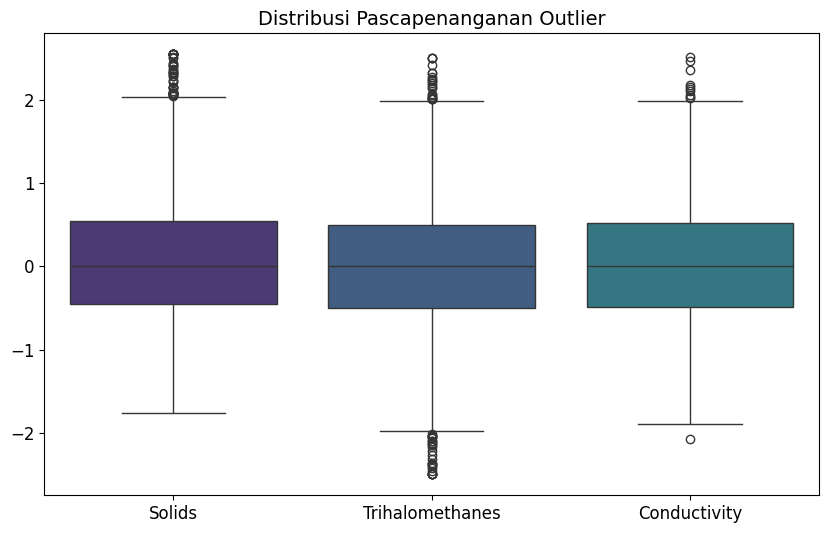

In [17]:
print("\n[VALIDASI] Analisis pascapreprocessing...")

# 1. Verifikasi penanganan outlier
outlier_cols = ['Solids', 'Trihalomethanes', 'Conductivity']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_imputed[outlier_cols])
plt.title('Distribusi Pascapenanganan Outlier', fontsize=14)
plt.savefig('/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/Doc_Result/post_outlier_validation.png')
plt.show()

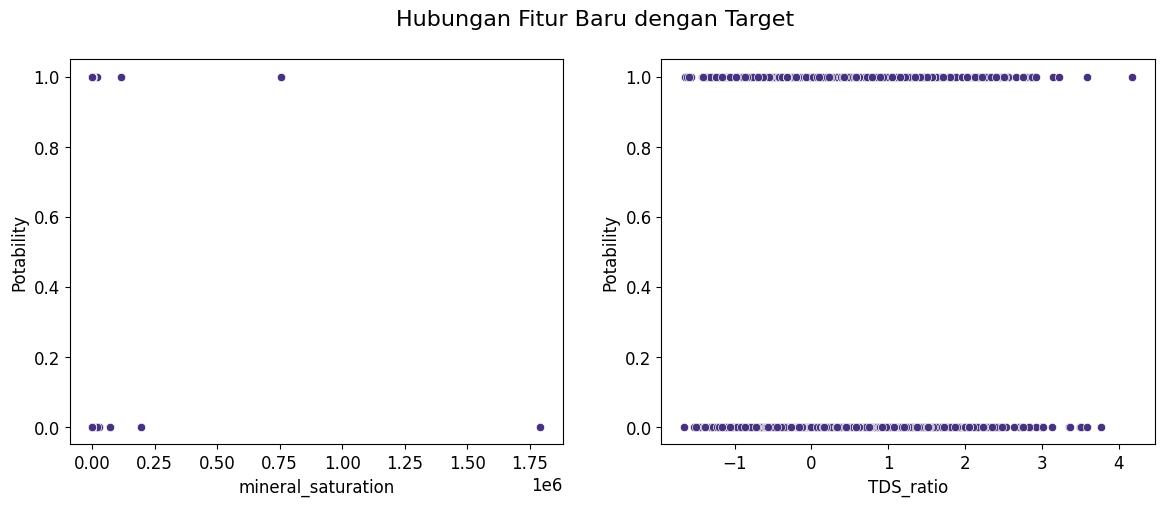

In [18]:
new_features = ['mineral_saturation', 'TDS_ratio']
_, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x=new_features[0], y='Potability', data=df_imputed, ax=axes[0])
sns.scatterplot(x=new_features[1], y='Potability', data=df_imputed, ax=axes[1])
plt.suptitle('Hubungan Fitur Baru dengan Target', fontsize=16)
plt.savefig('/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/Doc_Result/new_features_validation.png')
plt.show()

<Figure size 1200x800 with 0 Axes>

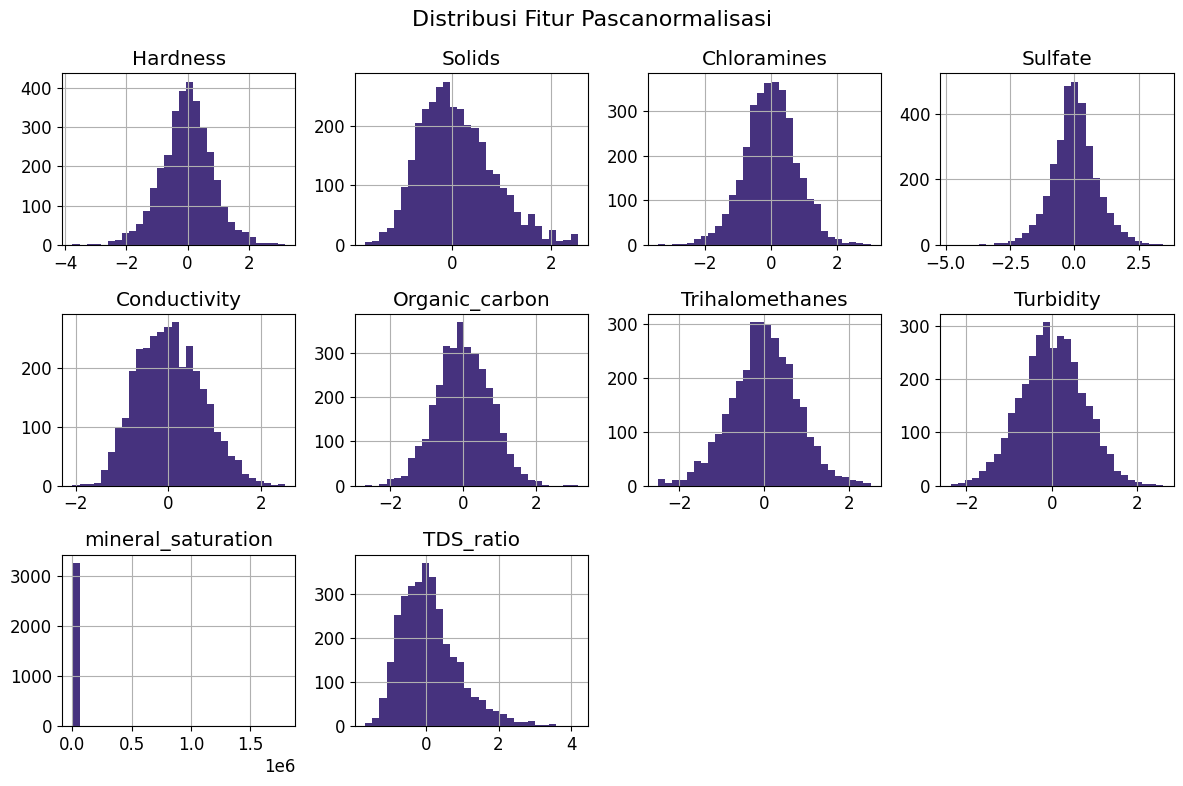

✅ Validasi preprocessing selesai


In [19]:
plt.figure(figsize=(12, 8))
df_imputed[numerical_features].hist(bins=30, layout=(3, 4))
plt.suptitle('Distribusi Fitur Pascanormalisasi', fontsize=16)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/Doc_Result/post_scaling_distributions.png')
plt.show()

print("✅ Validasi preprocessing selesai")

# **Ekspor Hasil Data Explorations**

In [20]:
processed_path = '/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/Preproces_Waterquality.csv'

df_imputed.to_csv(processed_path, index=False)
print(f"✅ Data bersih disimpan di: {processed_path}")

✅ Data bersih disimpan di: /content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/Preproces_Waterquality.csv


In [21]:
preprocessing_artifacts = {
    'imputer': imputer,
    'encoder': encoder,
    'scaler': scaler,
    'outlier_config': {
        'Solids': {'factor': 2.0},
        'Trihalomethanes': {'factor': 2.0},
        'Conductivity': {'factor': 2.0}
    }
}

joblib.dump(
    preprocessing_artifacts,
    '/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/preprocessing_artifacts.pkl'
)
print("✅ Metadata preprocessing disimpan")

✅ Metadata preprocessing disimpan


In [22]:
df_pre_normalization = df_imputed.copy()

numerical_features = ['Hardness', 'Solids', 'Chloramines', 'Sulfate',
    'Conductivity', 'Organic_carbon', 'Trihalomethanes',
    'Turbidity', 'mineral_saturation', 'TDS_ratio']

df_pre_normalization[numerical_features] = scaler.inverse_transform(df_imputed[numerical_features])
df_pre_normalization.to_csv(
    '/content/drive/MyDrive/MSML/Eksperimen_SML_septbyu/data_processed/pre_normalized_data.csv',
    index=False
)
print("✅ Versi pre-normalization disimpan")

✅ Versi pre-normalization disimpan
